In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [359]:
#データのダウンロード
train_data = pd.read_csv('csv/train.csv', index_col=0)
test_data = pd.read_csv('csv/test.csv', index_col=0)
val_data = pd.read_csv('csv/sample_submission.csv', index_col=0, header=None)

In [360]:
train_data.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


In [361]:
#訓練データのデータ、特徴量数
train_data.shape

(19984, 21)

In [435]:
train_df = train_data.copy()
test_df = test_data.copy()

In [436]:
"""
不均衡データ
"""
train_df['health'].value_counts().sort_index()

health
0     3535
1    15751
2      698
Name: count, dtype: int64

In [364]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null  int64 
 20  cncldist   

In [365]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19702 entries, 19984 to 39968
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19702 non-null  object
 1   tree_dbh    19702 non-null  int64 
 2   curb_loc    19702 non-null  object
 3   steward     5176 non-null   object
 4   guards      5135 non-null   object
 5   sidewalk    19702 non-null  object
 6   user_type   19702 non-null  object
 7   problems    7657 non-null   object
 8   spc_common  19702 non-null  object
 9   spc_latin   19702 non-null  object
 10  nta         19702 non-null  object
 11  nta_name    19702 non-null  object
 12  borocode    19702 non-null  int64 
 13  boro_ct     19702 non-null  int64 
 14  boroname    19702 non-null  object
 15  zip_city    19702 non-null  object
 16  cb_num      19702 non-null  int64 
 17  st_senate   19702 non-null  int64 
 18  st_assem    19702 non-null  int64 
 19  cncldist    19702 non-null  int64 
dtypes: int6

In [366]:
#各特徴量の欠損値数
train_df.isnull().sum()

created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [367]:
test_df.isnull().sum()

created_at        0
tree_dbh          0
curb_loc          0
steward       14526
guards        14567
sidewalk          0
user_type         0
problems      12045
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [368]:
#欠損値を含む特徴量のデータ確認
print(train_df['steward'].value_counts())
print('-'*30)
print(train_df['guards'].value_counts())
print('-'*30)
print(train_df['problems'].value_counts())
print('-'*30)
print('problemsのユニークデータ数')
train_df['problems'].unique().shape[0]

steward
1or2       3999
3or4       1079
4orMore      23
Name: count, dtype: int64
------------------------------
guards
Helpful    3650
Unsure      737
Harmful     654
Name: count, dtype: int64
------------------------------
problems
Stones                                  2219
BranchLights                            1036
StonesBranchLights                       762
BranchOther                              408
RootOther                                333
                                        ... 
StonesRootOtherTrunkOtherBranchOther       8
StonesRootOtherWiresRopeBranchOther        5
StonesMetalGratesTrunkOther                4
TrunkLightsBranchLightsBranchOther         4
WiresRopeTrunkLightsBranchLights           4
Name: count, Length: 73, dtype: int64
------------------------------
problemsのユニークデータ数


74

In [369]:
#----テストデーターーーーー
print(test_df['steward'].value_counts())
print('-'*30)
print(test_df['guards'].value_counts())
print('-'*30)
print(test_df['problems'].value_counts())
print('-'*30)
print('problemsのユニークデータ数')
test_df['problems'].unique().shape[0]

steward
1or2       4165
3or4        989
4orMore      22
Name: count, dtype: int64
------------------------------
guards
Helpful    3716
Unsure      753
Harmful     666
Name: count, dtype: int64
------------------------------
problems
Stones                                  2236
BranchLights                            1009
StonesBranchLights                       767
BranchOther                              385
RootOther                                384
                                        ... 
StonesRootOtherTrunkOtherBranchOther       7
WiresRopeTrunkLights                       6
StonesTrunkLightsBranchLights              6
WiresRopeTrunkLightsBranchLights           5
RootOtherWiresRopeTrunkLights              4
Name: count, Length: 73, dtype: int64
------------------------------
problemsのユニークデータ数


74

In [437]:
#欠損値をNULLに置き換え
train_df.fillna('NULL', inplace=True)
test_df.fillna('NULL', inplace=True)
print('-'*30 + '↓トレーニングデータ')
print(train_df.isnull().sum())
print('-'*30 + '↓テストデータ')
print(test_df.isnull().sum())

------------------------------↓トレーニングデータ
created_at    0
tree_dbh      0
curb_loc      0
health        0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
spc_common    0
spc_latin     0
nta           0
nta_name      0
borocode      0
boro_ct       0
boroname      0
zip_city      0
cb_num        0
st_senate     0
st_assem      0
cncldist      0
dtype: int64
------------------------------↓テストデータ
created_at    0
tree_dbh      0
curb_loc      0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
spc_common    0
spc_latin     0
nta           0
nta_name      0
borocode      0
boro_ct       0
boroname      0
zip_city      0
cb_num        0
st_senate     0
st_assem      0
cncldist      0
dtype: int64


In [438]:
#problemを問題あり、なしのバイナリデータに変換
train_df['bool_problems'] = train_df['problems'].apply(lambda x: 0 if x == 'NULL' else 1)
test_df['bool_problems'] = test_df['problems'].apply(lambda x: 0 if x == 'NULL' else 1)

In [439]:
train_df[['bool_problems', 'problems']].head(10)

,bool_problems,problems
0,0,NULL
1,0,NULL
2,1,StonesBranchLights
3,0,NULL
4,1,Stones
5,0,NULL
6,1,BranchLights
7,0,NULL
8,0,NULL
9,1,Stones


In [440]:
test_df[['bool_problems', 'problems']].head(10)

,bool_problems,problems
19984,0,NULL
19985,0,NULL
19986,0,NULL
19987,0,NULL
19988,1,Stones
19989,0,NULL
19990,0,NULL
19991,1,Stones
19992,1,StonesRootOtherTrunkOther
19993,1,RootOther


In [441]:
#必要な特徴量を選抜
val_df = train_df.pop('health')
select_train_df = train_df.drop(['created_at', 'spc_latin', 'nta_name','boroname'], axis=1)
select_test_df = test_df.drop(['created_at', 'spc_latin', 'nta_name','boroname'], axis=1)

In [442]:
select_train_df.head()

,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,nta,borocode,boro_ct,zip_city,cb_num,st_senate,st_assem,cncldist,bool_problems
0,14,OnCurb,NULL,NULL,Damage,Volunteer,NULL,English oak,QN45,4,4152901,Little Neck,411,11,25,23,0
1,5,OnCurb,3or4,Helpful,NoDamage,Volunteer,NULL,crimson king maple,BX05,2,2039901,Bronx,207,33,78,15,0
2,26,OnCurb,NULL,NULL,NoDamage,Volunteer,StonesBranchLights,English oak,SI01,5,5017011,Staten Island,503,24,62,51,1
3,15,OnCurb,NULL,NULL,Damage,NYC Parks Staff,NULL,honeylocust,SI11,5,5024401,Staten Island,503,24,62,51,0
4,23,OnCurb,NULL,NULL,NoDamage,Volunteer,Stones,London planetree,MN03,1,1022102,New York,110,30,70,9,1


In [443]:
select_train_df.dtypes

tree_dbh          int64
curb_loc         object
steward          object
guards           object
sidewalk         object
user_type        object
problems         object
spc_common       object
nta              object
borocode          int64
boro_ct           int64
zip_city         object
cb_num            int64
st_senate         int64
st_assem          int64
cncldist          int64
bool_problems     int64
dtype: object

In [444]:
select_test_df.dtypes

tree_dbh          int64
curb_loc         object
steward          object
guards           object
sidewalk         object
user_type        object
problems         object
spc_common       object
nta              object
borocode          int64
boro_ct           int64
zip_city         object
cb_num            int64
st_senate         int64
st_assem          int64
cncldist          int64
bool_problems     int64
dtype: object

In [445]:
#OrdinalEncodeのために数値コードのものをObject化
int_labels =['borocode', 'boro_ct', 'cb_num', 'st_senate', 'st_assem', 'cncldist'] 
select_train_df[int_labels] = select_train_df[int_labels].astype(str)
select_test_df[int_labels] = select_test_df[int_labels].astype(str)

In [446]:
#object型の特徴量を抽出
object_train_df = select_train_df.loc[:, select_train_df.dtypes == 'object']
object_test_df = select_test_df.loc[:, select_test_df.dtypes == 'object']

In [447]:
len(extra_col)

15

In [448]:
#ラベルエンコード

#抽出したobjectの名前、空df
extra_col = object_train_df.columns
label_train_df = pd.DataFrame()
label_test_df = pd.DataFrame(index=select_test_df.index)

#ラベルエンコード
oe = OrdinalEncoder()
label_train_df[extra_col] = oe.fit_transform(object_train_df)
label_test_df[extra_col] = oe.transform(object_test_df)
label_test_df[extra_col] = oe.transform(object_test_df)


# #ラベルエンコードしたデータに置き換え
select_train_df[extra_col] = label_train_df
select_test_df[extra_col] = label_test_df


<Axes: >

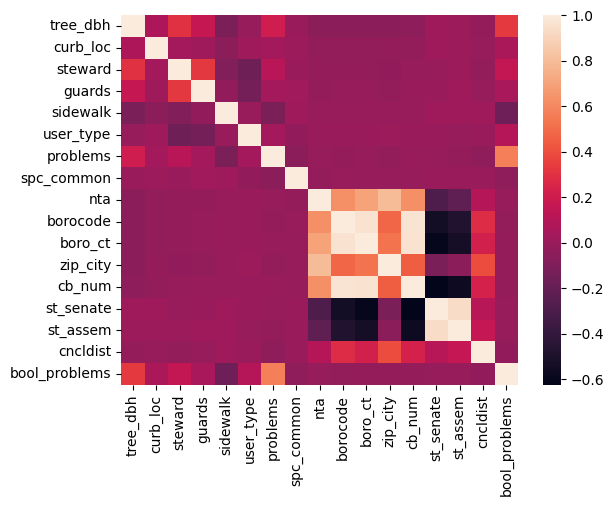

In [449]:
sns.heatmap(select_train_df.corr())

<Axes: >

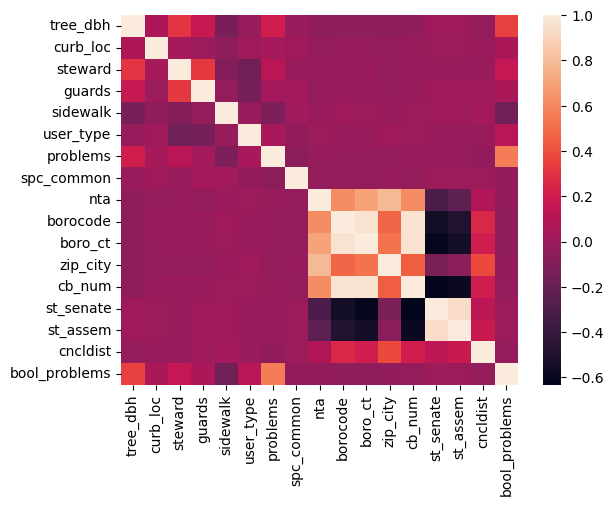

In [450]:
sns.heatmap(select_test_df.corr())

In [451]:
#多重共線性を危惧して相関係数の高くて、必要度が低いものをドロップ　＝＞ 次回はVIFも検討
select_train_df = select_train_df.drop(['boro_ct', 'cb_num', 'st_assem', 'zip_city'], axis=1)
select_test_df = select_test_df.drop(['boro_ct', 'cb_num', 'st_assem', 'zip_city'], axis=1)

<Axes: >

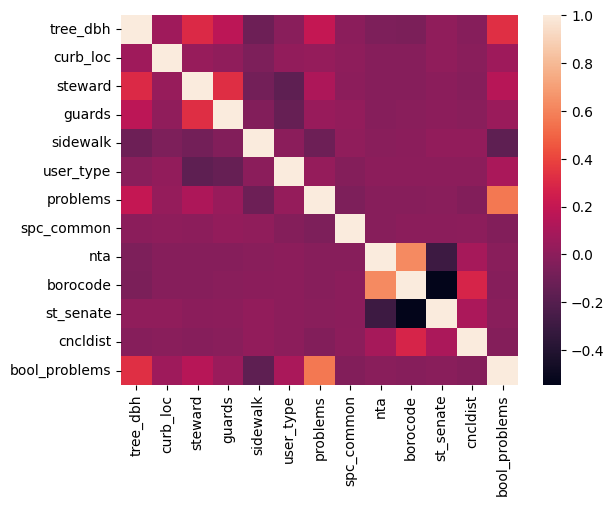

In [452]:
sns.heatmap(select_train_df.corr())

<Axes: >

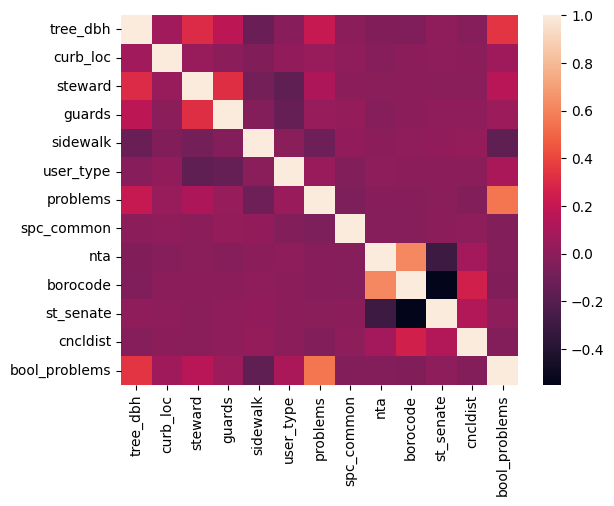

In [453]:
sns.heatmap(select_test_df.corr())

In [ ]:
"""
・tree_dbhの標準化　ー＞　今回はlightGBMを使用するので必要ない
・今までの処理をまとめる
・lightGBMをする
・結果からハイパーパラメータチューニング

"""

## ここから機械学習